In [32]:
# Importing necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [33]:
# Load the Excel file with two sheets
file_path = r'D:\Data Journey\Future Interns\Task 1\online_retail_II.xlsx'  # replace with your actual file path

# Read each sheet into a separate dataframe
df_09_10 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_10_11 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Optional: combine the two dataframes
df_all = pd.concat([df_09_10, df_10_11], ignore_index=True)

# Check the combined dataframe
print(df_all.info())
print(df_all.head())

print(list(df_all.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434  

In [34]:
# Question: What are the best selling products?
# Calculate Total Sales for each row
df_all['Total_Sales'] = df_all['Quantity'] * df_all['Price']

# Group by product description and sum total sales
Best_selling_pdt = df_all.groupby('Description')['Total_Sales'].sum()

# Display the result
print(Best_selling_pdt.sort_values(ascending=False))



Description
REGENCY CAKESTAND 3 TIER              327813.650
DOTCOM POSTAGE                        322647.470
WHITE HANGING HEART T-LIGHT HOLDER    257533.900
JUMBO BAG RED RETROSPOT               148800.640
PARTY BUNTING                         147948.500
                                         ...    
Discount                              -13484.540
Bank Charges                          -33493.669
Manual                                -82781.270
Adjust bad debt                      -147614.080
AMAZON FEE                           -260763.580
Name: Total_Sales, Length: 5698, dtype: float64


Month
11    2884410.892
12    2359978.590
10    2115873.020
9     1873338.053
3     1449115.841
6     1370909.730
8     1339456.850
5     1338656.340
7     1256536.471
1     1184033.152
4     1083787.553
2     1031154.076
Name: Total_Sales, dtype: float64


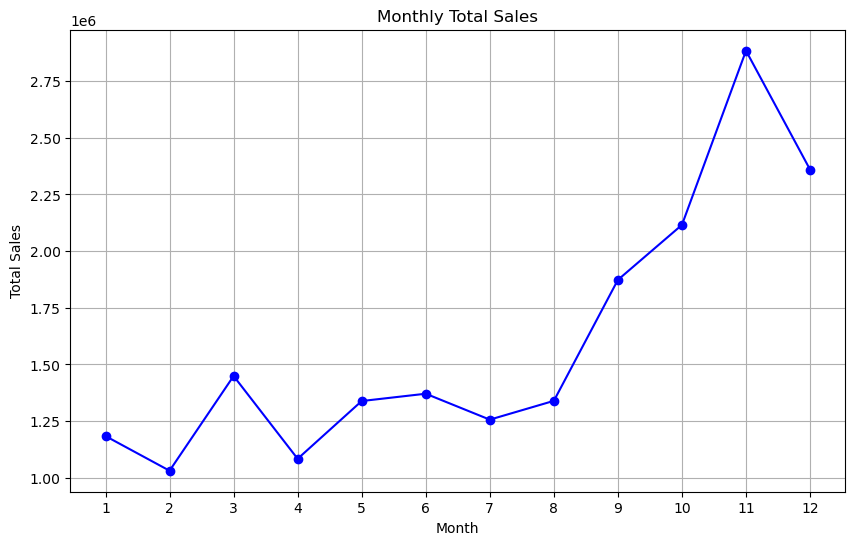

In [35]:
# Question 2: When do sales peak during the year?

# Convert 'InvoiceDate' to datetime format
df_all['InvoiceDate'] = pd.to_datetime(df_all['InvoiceDate'])

# Extract the month from 'InvoiceDate'
df_all['Month'] = df_all['InvoiceDate'].dt.month

# Group sales by month and sum the 'Total_Sales' to find monthly sales totals
monthly_sales = df_all.groupby('Month')['Total_Sales'].sum().sort_values(ascending=False)

# Display monthly sales totals
print(monthly_sales)

monthly_sales_sorted = monthly_sales.sort_index()
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted.index, monthly_sales_sorted.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Show months 1 to 12 on x-axis
plt.grid(True)
plt.show()



In [36]:
# Question Three: Which categories or regions bring in the most revenue?
# Ensure Total_Sales column exists
df_all['Total_Sales'] = df_all['Quantity'] * df_all['Price']

# Revenue by Country (Region)
revenue_by_country = df_all.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False)
print("Revenue by Country:")
print(revenue_by_country.head(10))




Revenue by Country:
Country
United Kingdom    1.638258e+07
EIRE              6.155196e+05
Netherlands       5.485249e+05
Germany           4.179886e+05
France            3.281918e+05
Australia         1.671291e+05
Switzerland       9.972876e+04
Spain             9.185948e+04
Sweden            8.780942e+04
Denmark           6.574109e+04
Name: Total_Sales, dtype: float64
